# Blatt 2 
## 1. Aufgabe: Verteilungen und Grenzwerte

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import scipy.stats as stats

### (a) Die Binomialverteilung nähert sich für n → ∞ und p → 0 mit festem λ = np der Poissonverteilung
Plotte und vergleiche die Binomialverteilung fur ¨ n = 2, 100, 1000 fur λ = 1 mit der Poissonverteilung. Diskutiere dazu den Mittelwert und die Standardabweichung

Binomial/Poisson quotient mit n=2: mittelwert 1.0873127313836184 standardabweichung 1.3591409142295234


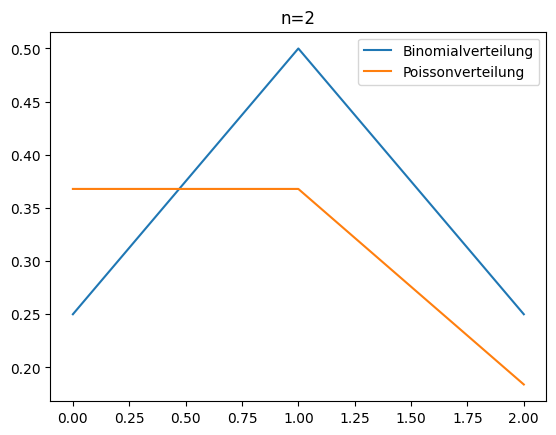

Binomial/Poisson quotient mit n=100: mittelwert 0.9999999999999997 standardabweichung 1.0005007456761803


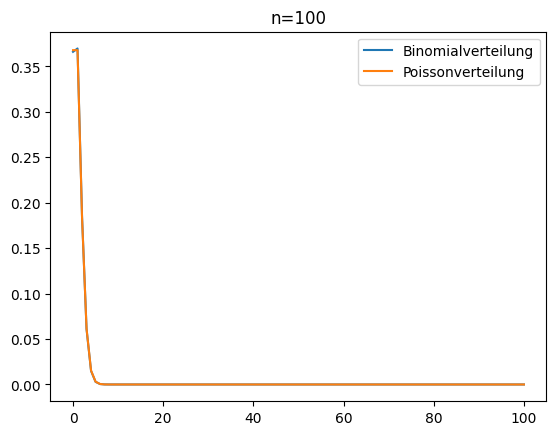

/home/emil/.local/lib/python3.10/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


Binomial/Poisson quotient mit n=1000: mittelwert 0.9999999999999998 standardabweichung 1.0000469932398406


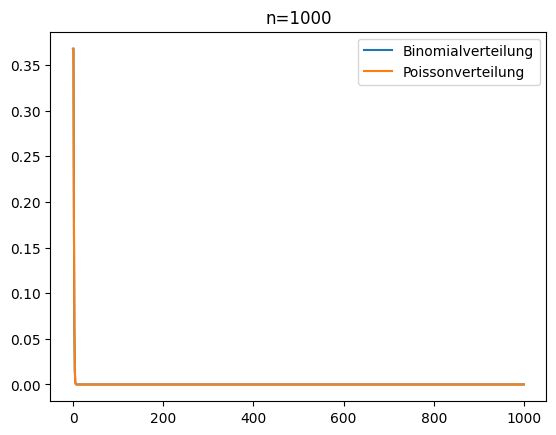

In [2]:
for n in [2,100,1000]:
    p = 1/n
    x = np.arange(0, n+1)
    y = stats.binom.pmf(x, n, p)
    z = stats.poisson.pmf(x, n*p)
    plt.plot(x, y, label=f'Binomialverteilung')
    plt.plot(x, z, label=f'Poissonverteilung')
    plt.title(f'n={n}')
    print(f'Binomial/Poisson quotient mit n={n}: mittelwert {np.average(y)/np.average(z)} standardabweichung {np.std(y)/np.std(z)}')
    plt.legend()
    plt.show()


The values marked as "Mittelwert" and "Standardabweichung" show the quotient between the mean value (Mittelwert) of the binomial and the poisson distribution and the quotient between the standard deviation (Standardabweichung) of the binomial and the poisson distribution. It can be observed that with increasing values for n and small values for p the distribution start to deviate very little from each other. It can also be observed that an increase by a factor of 10 decreases the deviation of the standard deviation by about a factor of 10. Also it shows that for the used value of p a value of n = 100 is already enough to very acurately approximate the binomial distribution using a poisson distribution.

### (b) Die Binomialverteilung nähert sich für n → ∞ der Normalverteilung (Gauss). Plotte und
vergleiche die Binomialverteilung fur ¨ p = 1/2 und n = 10, 100, 1000 mit der
Normalverteilung. Diskutiere wieder den Mittelwert und die Standardabweichung

Binomial/Normalverteilung quotient mit n=10: mittelwert 1.000406335083794 standardabweichung 0.9868442776350822


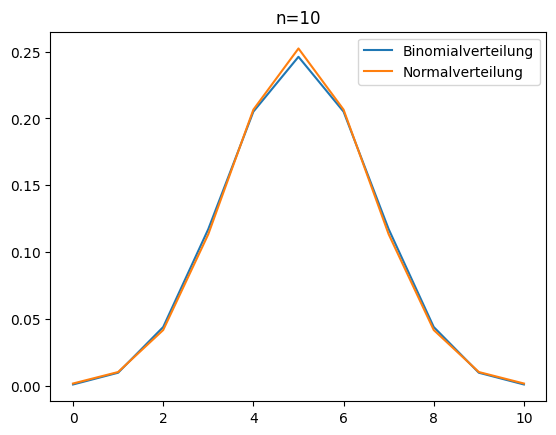

Binomial/Normalverteilung quotient mit n=100: mittelwert 0.9999999999999998 standardabweichung 0.9992421631445988


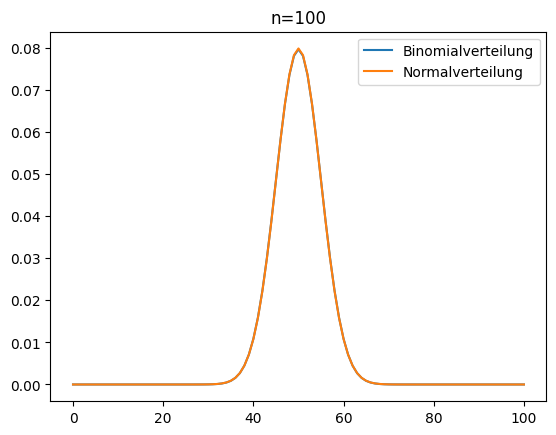

Binomial/Normalverteilung quotient mit n=1000: mittelwert 1.0 standardabweichung 0.999933794748392


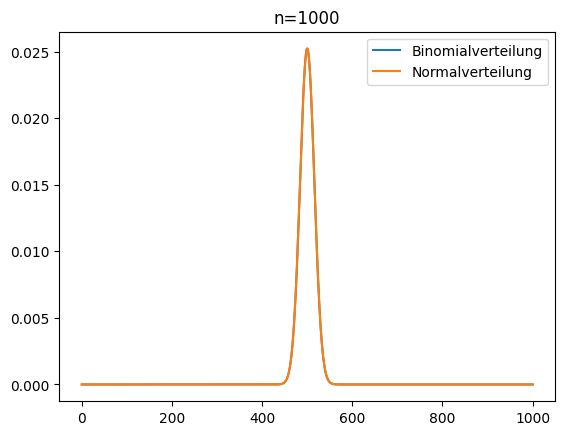

In [3]:
p = .5
for n in [10,100,1000]:
    x = np.arange(0, n+1)
    y = stats.binom.pmf(x, n, p)
    z = stats.norm.pdf(x, n*p, m.sqrt(n*p*(1-p)))

    plt.plot(x, y, label=f'Binomialverteilung')
    plt.plot(x, z, label=f'Normalverteilung')
    plt.title(f'n={n}')
    print(f'Binomial/Normalverteilung quotient mit n={n}: mittelwert {np.average(y)/np.average(z)} standardabweichung {np.std(y)/np.std(z)}')
    plt.legend()
    plt.show()

For the given value of p it seems that the normal distribution is already a good approximation for values of n as small as 10.

### (c) In welchem Fall kann man die Normalverteilung als Grenzfall der Poissonverteilungverwenden? 
Zeige es anhand eines Plottes.

Normal/Poisson quotient mit n=313: mittelwert 0.9999999990150489 standardabweichung 1.0273603088845171


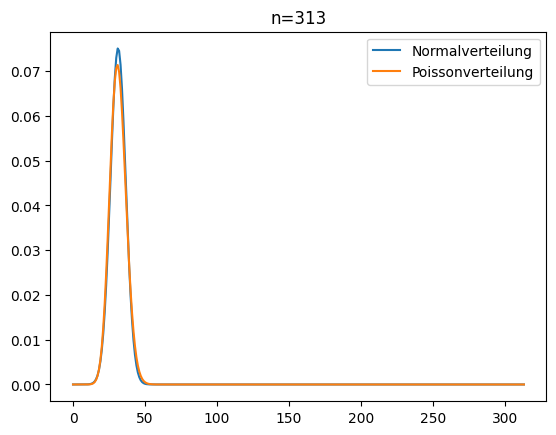

In [4]:
# für großes n und p = 1/n ist die Normalverteilung eine gute Näherung für die poissonverteilung
n = 10
p = 1/n
while True:
    x = np.arange(0, n+1)
    y = stats.norm.pdf(x, n*p, m.sqrt(n*p*(1-p)))
    z = stats.poisson.pmf(x, n*p)
    if np.abs(1-(np.average(y)/np.average(z))) < 1e-9:
        print(f'Normal/Poisson quotient mit n={n}: mittelwert {np.average(y/np.average(z))} standardabweichung {np.std(y)/np.std(z)}')
        plt.plot(x, y, label=f'Normalverteilung')
        plt.plot(x, z, label=f'Poissonverteilung')
        plt.title(f'n={n}')
        plt.legend()
        plt.show()
        break
    n += 1

The given plot shows that for big values of n (here 313) and small values for p (1/n) the normal distribution gives a decent approximation of the poission distribution.